### Load The Libraries

In [1218]:
import pandas as pd
import numpy as np
import pandas_profiling



### Importing The Train And Test Data

In [1128]:
dounut_train = pd.read_csv('D:/sparity test/Level 1 Dataset_ The Donut Problem/Donut Data Set - TrainingSet.csv')
dounut_test = pd.read_csv('D:/sparity test/Level 1 Dataset_ The Donut Problem/Donut Data Set - TestSet.csv')

### Statistical Analysis

In [1189]:
dounut_train.describe()

,Donut_ID,Donut_Estimator_1,Donut_Area_of_cross_section,Donut_Area_of_circumference_circle,Donut_area_of_central_hole,Donut_Estimator_2,Donut_Estimator_3,Donut_Estimator_4,Donut_Estimator_5,Donut_Estimator_6,Donut_Density,Donut_volume,Location_Mumbai,Location_Texas
count,749.00000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,375.00000,373.721976,721.110280,798.826088,0.204913,1026.276115,1012.011095,688.240761,685.752457,718.374740,27.231509,82.827904,0.332443,0.667557
std,152.83815,20.192157,54.730642,35.469513,0.057137,66.099601,57.209025,40.455338,43.810793,38.994765,1.903865,4.547354,0.471404,0.471404
min,188.00000,349.040000,653.780000,754.250000,0.140000,944.790000,943.250000,641.040000,634.930000,669.960000,24.700000,76.900000,0.000000,0.000000
25%,188.00000,349.040000,653.780000,754.250000,0.140000,944.790000,943.250000,641.040000,634.930000,669.960000,24.700000,76.900000,0.000000,0.000000
50%,375.00000,372.200000,718.260000,799.690000,0.200000,1027.100000,1008.780000,684.100000,678.050000,718.030000,27.500000,83.400000,0.000000,1.000000
75%,562.00000,398.970000,789.500000,842.020000,0.280000,1107.560000,1083.990000,741.530000,743.730000,766.860000,29.400000,88.100000,1.000000,1.000000
max,562.00000,398.970000,789.500000,842.020000,0.280000,1107.560000,1083.990000,741.530000,743.730000,766.860000,29.400000,88.100000,1.000000,1.000000


In [1190]:
pandas_profiling.ProfileReport(dounut_train)

Number of variables,14
Number of observations,749
Total Missing (%),0.0%
Total size in memory,82.0 KiB
Average record size in memory,112.1 B
Numeric,7
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


### Identyfying Outliers

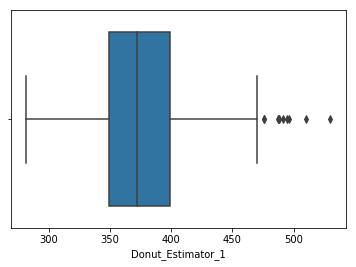

In [1129]:
sns.boxplot(dounut_train['Donut_Estimator_1'])

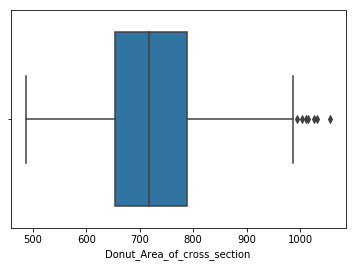

In [1168]:
sns.boxplot(dounut_train['Donut_Area_of_cross_section'])

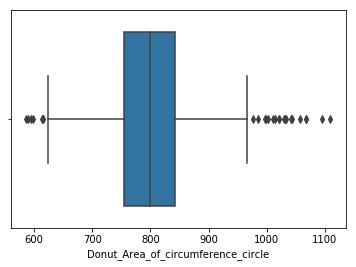

In [1170]:
sns.boxplot(dounut_train['Donut_Area_of_circumference_circle'])

In [1191]:
dounut_train = pd.get_dummies(dounut_train)
dounut_test = pd.get_dummies(dounut_test)

### Outlier Capping

In [1227]:
def outlier_capping(x):
    uw = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    lw = x.quantile(0.75)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(uw)
    x = x.clip_lower(lw)
    return x

In [1229]:
dounut_train=dounut_train.apply(lambda x: outlier_capping(x))

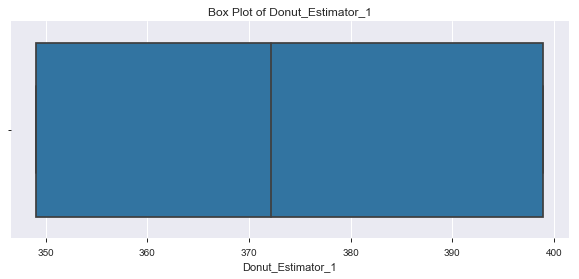

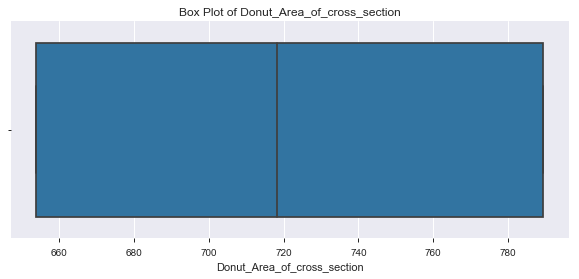

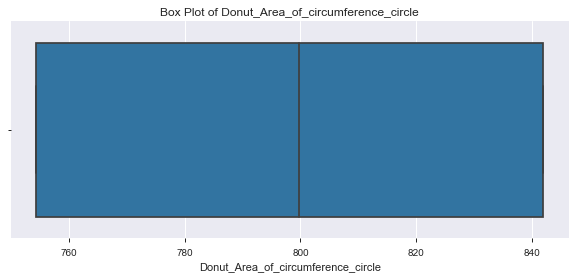

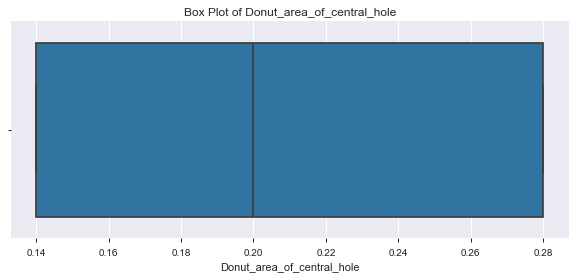

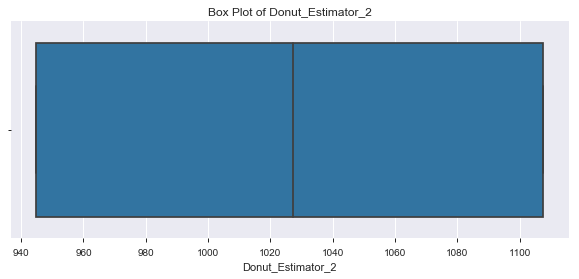

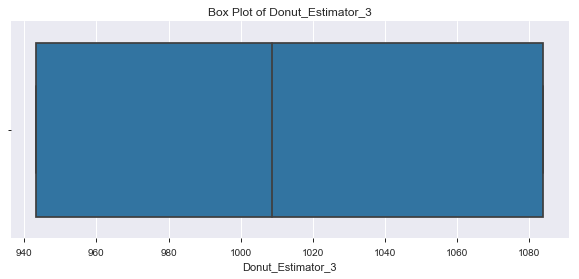

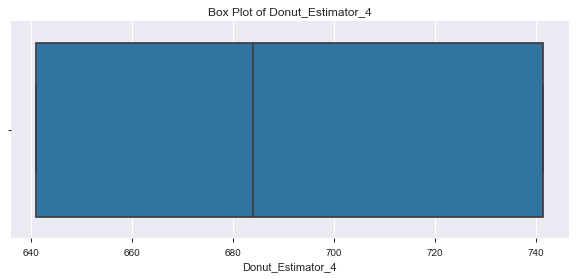

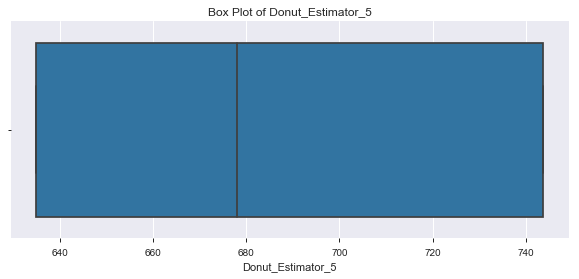

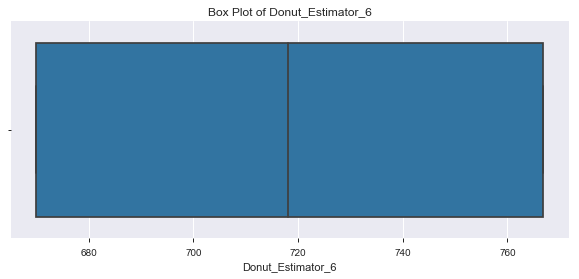

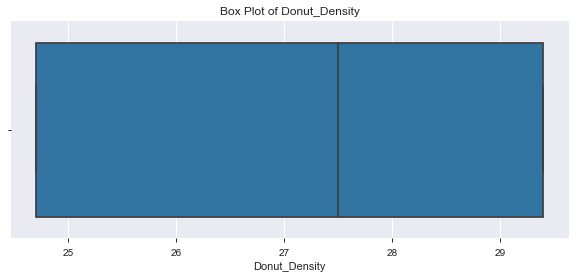

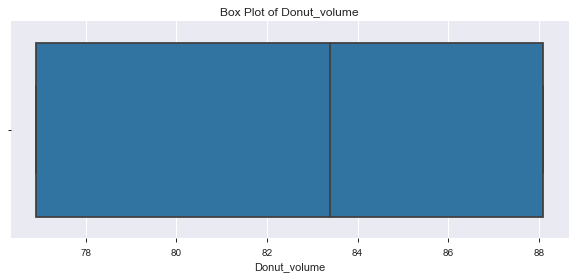

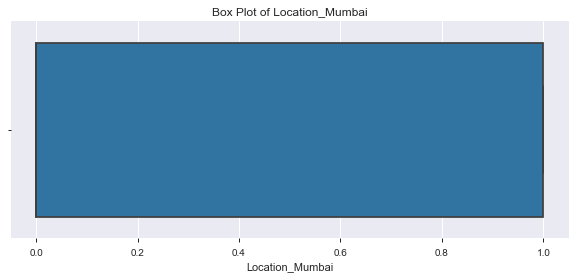

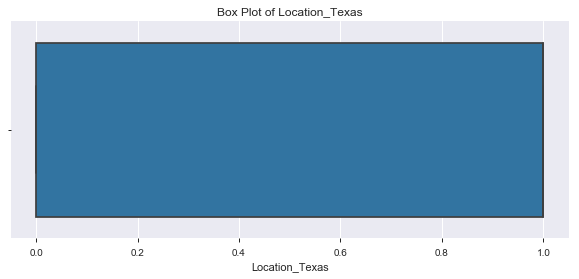

In [1232]:
for num_variable in dounut_train:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = dounut_train)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

### Cheking For Missing Values

In [1183]:
dounut_train.isna().sum()

Donut_ID                              0
Donut_Estimator_1                     0
Donut_Area_of_cross_section           0
Donut_Area_of_circumference_circle    0
Donut_area_of_central_hole            0
Donut_Estimator_2                     0
Donut_Estimator_3                     0
Donut_Estimator_4                     0
Donut_Estimator_5                     0
Donut_Estimator_6                     0
Donut_Density                         0
Donut_volume                          0
Location_Mumbai                       0
Location_Texas                        0
dtype: int64

In [1184]:
dounut_test.isna().sum()

Donut_ID                              0
Donut_Estimator_1                     0
Donut_Area_of_cross_section           0
Donut_Area_of_circumference_circle    0
Donut_area_of_central_hole            0
Donut_Estimator_2                     0
Donut_Estimator_3                     0
Donut_Estimator_4                     0
Donut_Estimator_5                     0
Donut_Estimator_6                     0
Location                              0
Donut_Density                         0
Donut_volume                          0
dtype: int64

In [1185]:
dounut_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 14 columns):
Donut_ID                              749 non-null float64
Donut_Estimator_1                     749 non-null float64
Donut_Area_of_cross_section           749 non-null float64
Donut_Area_of_circumference_circle    749 non-null float64
Donut_area_of_central_hole            749 non-null float64
Donut_Estimator_2                     749 non-null float64
Donut_Estimator_3                     749 non-null float64
Donut_Estimator_4                     749 non-null float64
Donut_Estimator_5                     749 non-null float64
Donut_Estimator_6                     749 non-null float64
Donut_Density                         749 non-null float64
Donut_volume                          749 non-null float64
Location_Mumbai                       749 non-null float64
Location_Texas                        749 non-null float64
dtypes: float64(14)
memory usage: 82.0 KB


In [1011]:
dounut_test.columns

Index(['Donut_ID', 'Donut_Estimator_1', 'Donut_Area_of_cross_section',
       'Donut_Area_of_circumference_circle', 'Donut_area_of_central_hole',
       'Donut_Estimator_2', 'Donut_Estimator_3', 'Donut_Estimator_4',
       'Donut_Estimator_5', 'Donut_Estimator_6', 'Location', 'Donut_Density',
       'Donut_volume'],
      dtype='object')

### Split The Dataset Into Dependent and Independent Variables

In [1193]:
train_x = dounut_train.drop(['Donut_Density', 'Donut_Estimator_3', 'Donut_Estimator_5', 'Donut_Estimator_1', 'Donut_Estimator_5'],axis =1)
train_y = dounut_train['Donut_Density']
test_x = dounut_test.drop(['Donut_Density', 'Donut_Estimator_3', 'Donut_Estimator_5', 'Donut_Estimator_1', 'Donut_Estimator_5'],axis =1)
test_y = dounut_test['Donut_Density']

### Build The Model

In [1194]:
from sklearn.linear_model import LinearRegression

In [1195]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting The Test Data

In [1196]:
test_predict = model.predict(test_x)
test_predict = pd.DataFrame(test_predict,columns = ['predicted_Donut_Density'])
test_predict.head()

,predicted_Donut_Density
0,15.471275
1,16.190151
2,16.651834
3,16.840698
4,18.437376


In [1197]:
from sklearn.metrics import mean_squared_error

### Mean Square Error

In [1198]:
mse = mean_squared_error(test_y,test_predict)
mse

4.685288774301237

### Root Mean Square Error

In [1199]:
rmse = np.sqrt(mse)
rmse

2.164552788522663

In [1020]:
import matplotlib.pyplot as plt

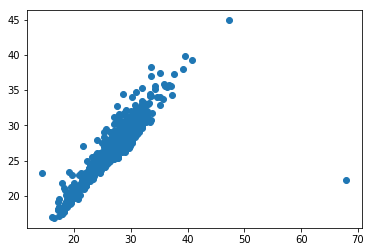

In [1021]:
plt.scatter(test_y,test_predict)

### Dounut_Volume

### Split The Dataset Into Dependent and Independent Variables

In [1210]:
train_x1 = dounut_train.drop(['Donut_volume'],axis =1)
train_y1 = dounut_train['Donut_volume']
test_x1 = dounut_test.drop(['Donut_volume'],axis =1)
test_y1 = dounut_test['Donut_volume']

### Build The Model

In [1211]:
from sklearn.linear_model import LinearRegression

In [1212]:
model = LinearRegression()
model.fit(train_x1,train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting The Test Data

In [1213]:
test_predict1 = model.predict(test_x1)
test_predict1 = pd.DataFrame(test_predict1,columns = ['predicted_Donut_volume'])
test_predict1.head()

,predicted_Donut_volume
0,62.559643
1,62.415708
2,64.552180
3,64.357783
4,66.843956


### Mean Square Error

In [1214]:
mse = mean_squared_error(test_y1,test_predict1)

In [1215]:
mse

20.22949468869386

### Root Mean Squared Error

In [1216]:
rmse = np.sqrt(mse)

In [1217]:
rmse

4.497721055011511

### scatter plot

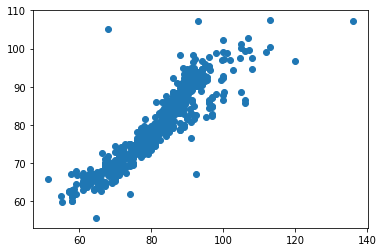

In [1039]:
plt.scatter(test_y1,test_predict1)

In [1041]:
dounut_test.head()

,Donut_ID,Donut_Estimator_1,Donut_Area_of_cross_section,Donut_Area_of_circumference_circle,Donut_area_of_central_hole,Donut_Estimator_2,Donut_Estimator_3,Donut_Estimator_4,Donut_Estimator_5,Donut_Estimator_6,Location,Donut_Density,Donut_volume,predicted_Donut_volume
0,1,354.84,512.67,703.84,0.28,801.96,820.74,725.30,759.01,535.97,Mumbai,16.08,51.4,65.847764
1,2,284.50,419.91,632.08,0.33,698.40,694.26,523.64,522.64,509.75,Mumbai,16.52,55.2,59.858085
2,3,298.34,450.13,701.23,0.36,798.88,749.28,517.35,502.82,626.46,Mumbai,17.90,57.0,62.763671
3,4,302.40,472.97,694.86,0.32,798.38,769.71,530.10,522.51,602.89,Mumbai,17.90,57.0,62.459752
4,5,422.84,726.44,806.40,0.10,1036.23,1048.50,781.72,791.55,710.68,Mumbai,18.80,57.8,67.027384


In [1042]:
import seaborn as sns
corr=dounut_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Donut_ID,Donut_Estimator_1,Donut_Area_of_cross_section,Donut_Area_of_circumference_circle,Donut_area_of_central_hole,Donut_Estimator_2,Donut_Estimator_3,Donut_Estimator_4,Donut_Estimator_5,Donut_Estimator_6,Donut_Density,Donut_volume
Donut_ID,1,0.0939523,0.653028,0.49512,0.249677,0.517132,0.46809,0.184221,0.127768,0.516165,0.597937,0.704525
Donut_Estimator_1,0.0939523,1,0.650738,0.643719,-0.694653,0.706845,0.765213,0.891507,0.865915,0.554451,0.446399,0.439096
Donut_Area_of_cross_section,0.653028,0.650738,1,0.894831,-0.191603,0.933241,0.946208,0.623886,0.563373,0.909919,0.542123,0.59268
Donut_Area_of_circumference_circle,0.49512,0.643719,0.894831,1,-0.052315,0.923725,0.951585,0.615347,0.561885,0.956129,0.459055,0.498201
Donut_area_of_central_hole,0.249677,-0.694653,-0.191603,-0.052315,1,-0.225134,-0.296388,-0.570153,-0.579371,-0.000814098,-0.193114,-0.171451
Donut_Estimator_2,0.517132,0.706845,0.933241,0.923725,-0.225134,1,0.954821,0.619181,0.534877,0.892734,0.489237,0.547625
Donut_Estimator_3,0.46809,0.765213,0.946208,0.951585,-0.296388,0.954821,1,0.697862,0.649267,0.93156,0.517715,0.561486
Donut_Estimator_4,0.184221,0.891507,0.623886,0.615347,-0.570153,0.619181,0.697862,1,0.98903,0.499436,0.458221,0.442995
Donut_Estimator_5,0.127768,0.865915,0.563373,0.561885,-0.579371,0.534877,0.649267,0.98903,1,0.449323,0.439096,0.415256
Donut_Estimator_6,0.516165,0.554451,0.909919,0.956129,-0.000814098,0.892734,0.93156,0.499436,0.449323,1,0.433809,0.47922


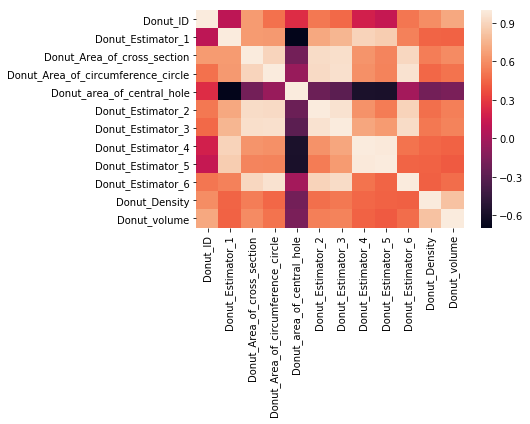

In [1043]:
sns.heatmap(corr)